## Importing Pyspark Libraries

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 39.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=9fe63a1d3a7d5cb0333df378fbd4312db54a9677cee2c7ff16dd7b5d4cc5d5da
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import isnan, when, count, col,lit
from pyspark import SparkContext, HiveContext
from pyspark.sql.functions import substring
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.feature import StringIndexer, VectorAssembler, VectorSlicer
from pyspark.ml.feature import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

## Setting Up Spark and Hive Context

In [ ]:
sc = SparkContext(appName = "Hive_opertations")
hive_context = HiveContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:604: FutureWarning: HiveContext is deprecated in Spark 2.0.0. Please use SparkSession.builder.enableHiveSupport().getOrCreate() instead.
  FutureWarning


In [ ]:
#create a sparksession 
spark = SparkSession.builder.getOrCreate()

In [ ]:
spark

## Load The Data

In [ ]:
## Read data
data = spark.read.csv("/content/drive/MyDrive/UNSW-NB15.csv",inferSchema=True,header=False)

In [ ]:
# read feature data
feature_data = spark.read.csv("/content/UNSW-NB15_features.csv",inferSchema=True,header=True)

## Renaming Columns

In [ ]:
col = feature_data.select("Name").rdd.flatMap(lambda x: x).collect()
o_c=data.columns

In [ ]:
#rename column
for i in range(49):
    data = data.withColumnRenamed(o_c[i],col[i])

In [ ]:
data.printSchema()

root
 |-- srcip: string (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: double (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: double (nullable = true)
 |-- Dload: double (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: long (nullable = true)
 |-- dtcpb: long (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 |-- S

## Total Number of Rows

In [ ]:
print("Total Numbers of rows in the dataset are {0} ".format(data.count()))

Total Numbers of rows in the dataset are 2539739 


## Dataframe Schema

In [ ]:
data.printSchema()

root
 |-- srcip: string (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: double (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: double (nullable = true)
 |-- Dload: double (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: long (nullable = true)
 |-- dtcpb: long (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 |-- S

## Creating a Hive Tabele

In [ ]:
# Register this dataframe as a Table
data.registerTempTable("data_h")

/usr/local/lib/python3.7/dist-packages/pyspark/sql/dataframe.py:140: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  FutureWarning


In [ ]:
# read data using hive query
hive_context.sql(" select * from data_h ;").show(2)

+----------+-----+-------------+------+-----+-----+----------+------+------+----+----+-----+-----+-------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+---------+---------+----------+----------+---------+--------+------------+------------+-------+---------------+------------+----------------+------------+----------+----------+----------+----------+-----------+----------------+----------------+--------------+----------+-----+
|     srcip|sport|        dstip|dsport|proto|state|       dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|     Djit|     Stime|     Ltime|  Sintpkt| Dintpkt|      tcprtt|      synack| ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+----------+-----+--------

## Showing the Hive Table

In [ ]:
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         |   data_h|       true|
+---------+---------+-----------+



# replace null value with normal and create a new column attack_cat_


In [ ]:
data=hive_context.sql("select *, nvl(attack_cat,'Normal') as attack_cats from data_h;")
data.show()

+----------+-----+-------------+------+-----+-----+------------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+----------+---------+----------+----------+------------+------------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+-----------+----------------+----------------+--------------+----------+-----+-----------+
|     srcip|sport|        dstip|dsport|proto|state|         dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|      Sjit|     Djit|     Stime|     Ltime|     Sintpkt|     Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|

## Dropping old Attack Cat column

In [ ]:
df = data.drop('attack_cat')

## Summary of The dataset

* Count
* Mean
* STD 
* Min 
* Max

In [ ]:
df.describe().show()

+-------+-----------+------------------+-----------+------------------+-------+-------+------------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+-------+--------------------+-----------------+-----------------+------------------+------------------+------------------+--------------------+--------------------+------------------+------------------+-------------------+------------------+------------------+------------------+--------------------+--------------------+------------------+-----------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+-------------------+-----------+
|summary|      srcip|             sport|      dstip|            dsport|  proto|  state|            

## Checking NUll Values

In [ ]:
from pyspark.sql.functions import col,isnan, when, count

In [ ]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----+-----+-----+------+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+----+----+-----+-----+-------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+-----------+----------------+----------------+--------------+-----+-----------+
|srcip|sport|dstip|dsport|proto|state|dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|Sload|Dload|Spkts|Dpkts|swin|dwin|stcpb|dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|Sjit|Djit|Stime|Ltime|Sintpkt|Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|Label|attack_cat_|
+-----+-----+-----+------+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+

## Exploratory Data Analysis

## ATTACK vs Normal

In [ ]:
# Register this dataframe as a Table
df.registerTempTable("data_unsw")

#replace 0 to normal and 1 to anomly, create a new column using the if condtion 

In [ ]:
data=hive_context.sql("select *, if(Label=0,'Normal','Anomly')as Target from data_unsw;")

In [ ]:
data.registerTempTable("data_unsw1")

In [ ]:
b_atck=hive_context.sql("select Target,count(*) as count from data_unsw1 group by Target;")

In [ ]:
b_atck.show()

+------+-------+
|Target|  count|
+------+-------+
|Anomly| 321283|
|Normal|2218456|
+------+-------+



In [ ]:
b_atck = b_atck.toPandas()

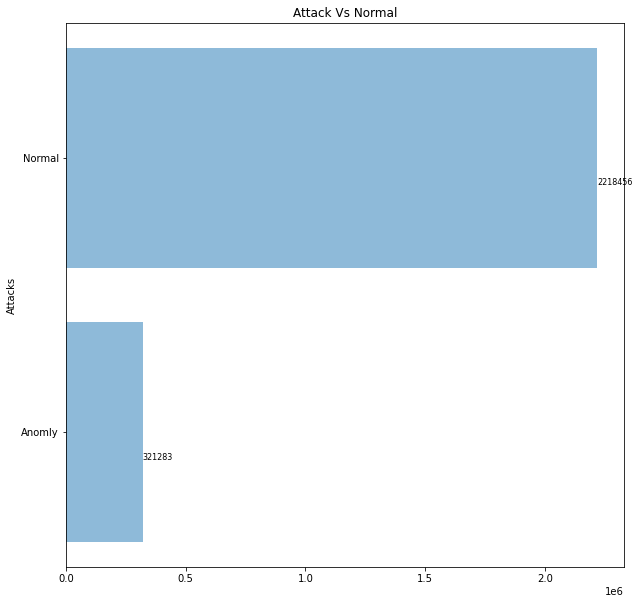

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

ax = fig.add_subplot(111)

ax.barh(b_atck['Target'], b_atck['count'], align='center', alpha=0.5)

#annotate bar plot with values
for i in ax.patches:
    ax.text(i.get_width()+.09, i.get_y()+.3, str(round((i.get_width()), 1)), fontsize=8)

plt.ylabel('Attacks')
plt.title('Attack Vs Normal')
plt.show();

## Clasification of Attacks

In [ ]:
n_atck =hive_context.sql(" select attack_cat_, count(*) as count from data_unsw1 group by attack_cat_ ;")
n_atck.show()

+---------------+-------+
|    attack_cat_|  count|
+---------------+-------+
|          Worms|    174|
|       Analysis|   2677|
|     Shellcode |   1288|
|            DoS|  16353|
|Reconnaissance |  12228|
|       Backdoor|   1795|
|       Fuzzers |  19195|
|       Exploits|  44525|
|         Normal|2218456|
|        Generic| 215481|
|      Shellcode|    223|
|      Backdoors|    534|
|        Fuzzers|   5051|
| Reconnaissance|   1759|
+---------------+-------+



In [ ]:
n_atck = n_atck.toPandas()

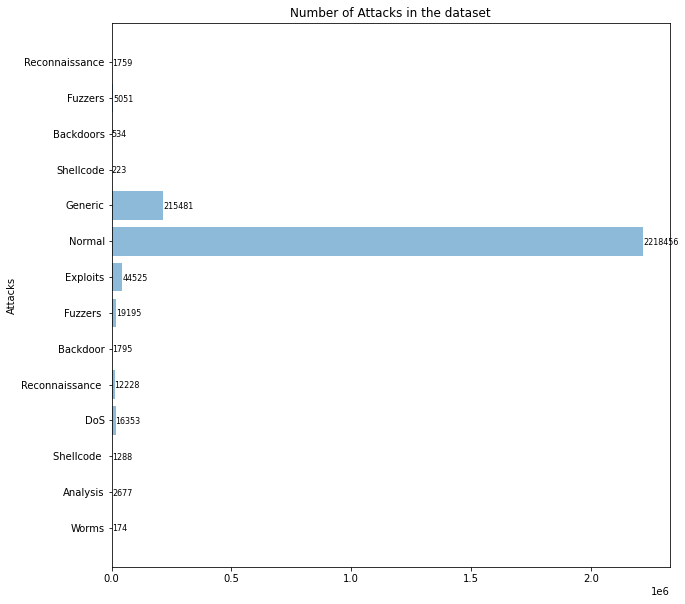

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

ax = fig.add_subplot(111)

ax.barh(n_atck['attack_cat_'], n_atck['count'], align='center', alpha=0.5)

#annotate bar plot with values
for i in ax.patches:
    ax.text(i.get_width()+.09, i.get_y()+.3, str(round((i.get_width()), 1)), fontsize=8)

plt.ylabel('Attacks')
plt.title('Number of Attacks in the dataset')
plt.show();

# convert unix epoch second to date using date function 


In [ ]:
data=hive_context.sql("SELECT *,(to_date(from_unixtime(Stime))) as date from data_unsw1;")
data.select("date").show(2)

+----------+
|      date|
+----------+
|2015-01-22|
|2015-01-22|
+----------+
only showing top 2 rows



In [ ]:
data.registerTempTable("data_unsw2")
atck_cnt_22 = hive_context.sql("select attack_cat_, count(*) as count from data_unsw2 where date='2015-01-22' group by attack_cat_;")

## Number of count attack_cat dated 2015-01-22 (apply condition Where=2015-01-22)

In [ ]:
atck_cnt_22.show()

+--------------+-------+
|   attack_cat_|  count|
+--------------+-------+
|        Normal|1030581|
|         Worms|     24|
|     Shellcode|    223|
|     Backdoors|    534|
|       Fuzzers|   5051|
|      Analysis|    526|
|           DoS|   1167|
|Reconnaissance|   1759|
|      Exploits|   5409|
|       Generic|   7522|
+--------------+-------+



In [ ]:
atck_cnt_22 = atck_cnt_22.toPandas()

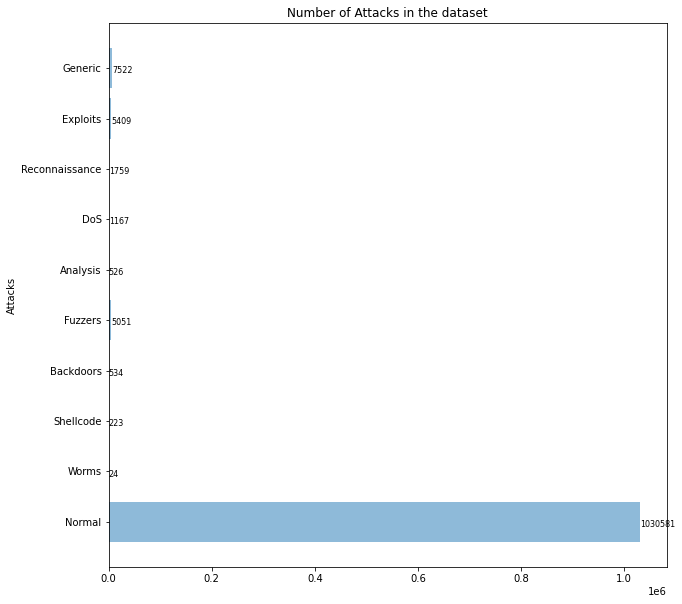

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

ax = fig.add_subplot(111)

ax.barh(atck_cnt_22['attack_cat_'], atck_cnt_22['count'], align='center', alpha=0.5)

#annotate bar plot with values
for i in ax.patches:
    ax.text(i.get_width()+.09, i.get_y()+.3, str(round((i.get_width()), 1)), fontsize=8)

plt.ylabel('Attacks')
plt.title('Number of Attacks in the dataset')
plt.show();

## State number of count 

In [ ]:
state_ = hive_context.sql("select state, count(*) as count from data_unsw1 group by state;")

In [ ]:
state_n= state_.select("state").rdd.flatMap(lambda x: x).collect()

In [ ]:
state_c= state_.select("count").rdd.flatMap(lambda x: x).collect()

In [ ]:
# remove none and its value from the list (index number 3)
state_n.pop(3)
state_c.pop(3)

8

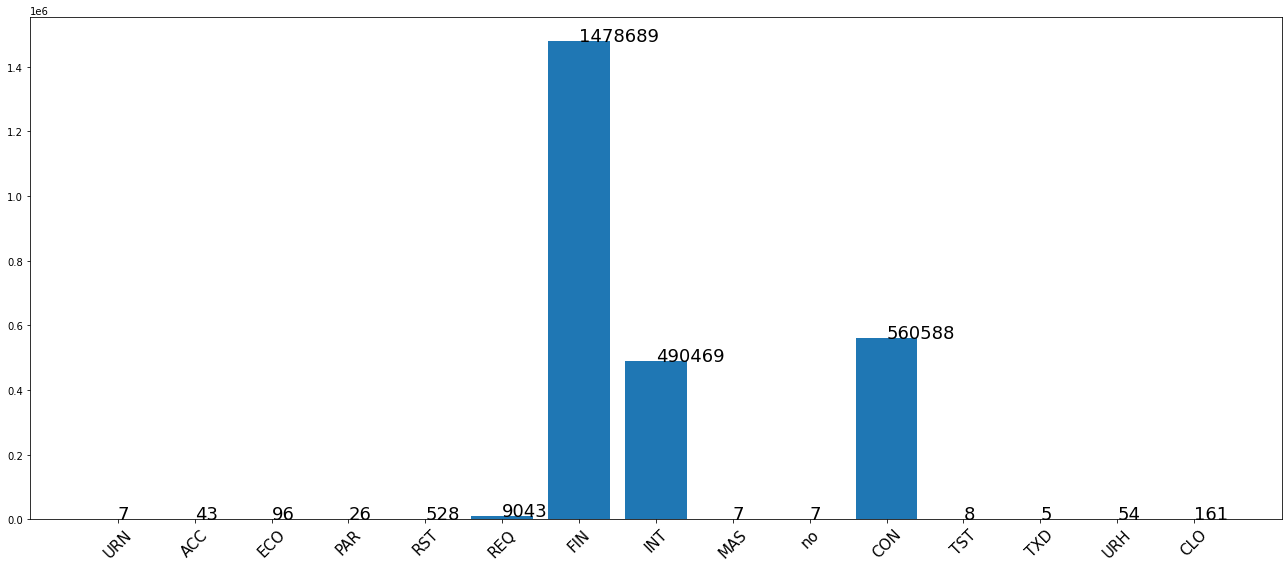

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
c3 = tuple(state_c)
#Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (18,8))
ax.bar(state_n,c3)
for index,data in enumerate(c3):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=18))
plt.xticks(rotation=45,size=15)
plt.tight_layout()
plt.show()

## dmeansz
Numerical feature. Mean of the flow packet size transmitted by the dst

* Feature range between 0 to 1500
* For non-attck data most values are between 0-200. And few of them are distributed from 400 to 800


In [ ]:
dmeansz_normal = hive_context.sql("select dmeansz from data_unsw1  where Label == 0")
dmeansz_anomaly = hive_context.sql("select dmeansz from data_unsw1  where Label == 1")

In [ ]:
dmeansz_normal = dmeansz_normal.toPandas()
dmeansz_anomaly = dmeansz_anomaly.toPandas()

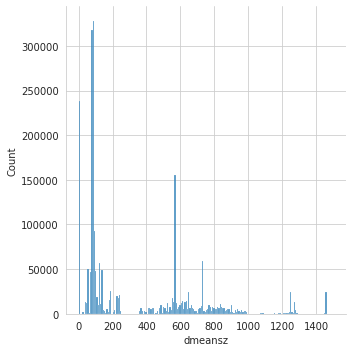

In [ ]:
sns.displot(dmeansz_normal['dmeansz'], label='normal')

* Most of the values in anomaly from 0 to 100.

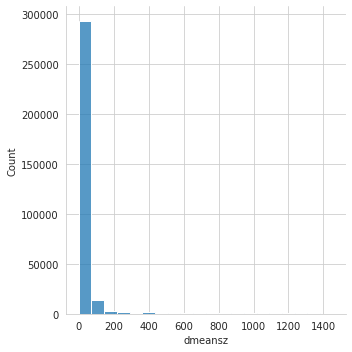

In [ ]:
sns.displot(dmeansz_anomaly['dmeansz'], label='anomaly')

## sttl
Numerical feature with only 13 unique value.

* normal cat data has most of its values 31 and few 60.
* anomaly cat has almost all of its value 254.

In [ ]:
sttl = hive_context.sql("select sttl,Label from data_unsw1")

In [ ]:
sttl = sttl.toPandas()

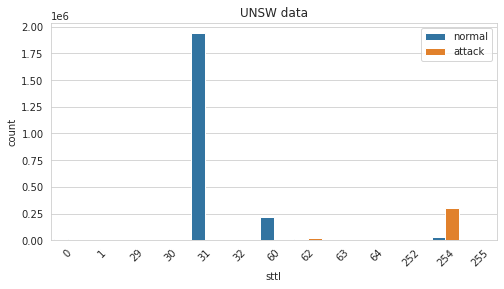

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('whitegrid')
# countplot of the given column
ax = sns.countplot(x='sttl', hue='Label', data=sttl)
ax.legend(loc="upper right", labels=('normal', 'attack'))
ax.set_title("UNSW data")
plt.xticks(rotation=45)
plt.show()

## Ftp Login
Numerical feature with 2 unique value.

* Most of Attack that occur doesnt required FTP login
* Only 1909 Attack were done in which FTP login was given


In [ ]:
ftp = hive_context.sql("select is_ftp_login,Label from data_unsw1 where is_ftp_login != 2 and is_ftp_login != 4")

In [ ]:
ftp = ftp.toPandas()

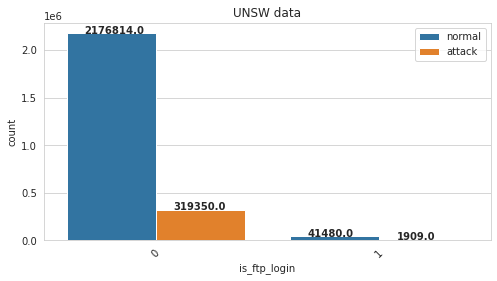

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('whitegrid')
# countplot of the given column
ax = sns.countplot(x='is_ftp_login', hue='Label', data=ftp)
ax.legend(loc="upper right", labels=('normal', 'attack'))
ax.set_title("UNSW data")
for rect in ax.patches:
    ax.text (rect.get_x()  + rect.get_width() /5,rect.get_height(),"%.1f"% rect.get_height(), weight='bold' )
plt.xticks(rotation=45)
plt.show()

## Correlation

In [ ]:
#drop all null values from the dataset
data_ = df.na.drop()

In [ ]:
#convert data to pandas dataframe
data_pd = data_.toPandas()

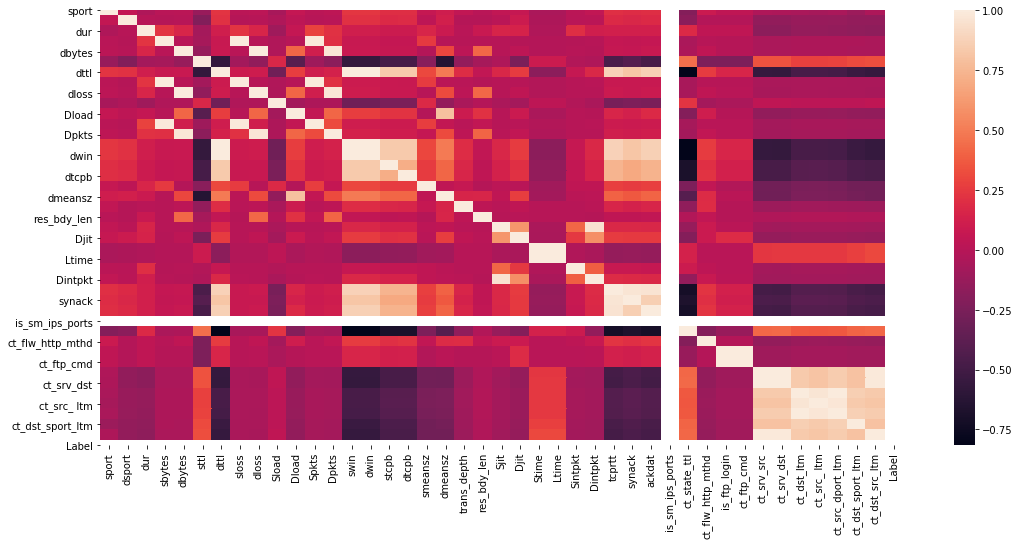

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (18,8))
sns.heatmap(data_pd.corr())

# hypothesis testing

* null hypothesis - there is no significance distance between in the average of record total duration of normal and anomly. 

* alternate hypothesis - there is significance distance between in the average of record total duration of normal and anomly. 

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
normal = df.filter(df.Label==0)
anomly = df.filter(df.Label==1)

In [ ]:
dur_mean_normal=normal.agg({'dur': 'mean'})
dur_mean_anomly=anomly.agg({'dur': 'mean'})

In [ ]:
dur_mean_normal.show()

+------------------+
|          avg(dur)|
+------------------+
|0.6484919343051566|
+------------------+



In [ ]:
dur_mean_anomly.show()

+------------------+
|          avg(dur)|
+------------------+
|0.7304782730691726|
+------------------+



In [ ]:
dur_nor = normal.select("dur").rdd.flatMap(lambda x: x).collect()

In [ ]:
dur_anomly = anomly.select("dur").rdd.flatMap(lambda x: x).collect()

# p value 

In [ ]:
ttest_ind(dur_nor,dur_anomly,equal_var=True)

Ttest_indResult(statistic=-3.118874026280416, pvalue=0.0018154559048992132)

# distribution plot 

In [ ]:
dur_ = df.select('dur').na.drop()

In [ ]:
rec_tot_dur = dur_.select("dur").rdd.flatMap(lambda x: x).collect()

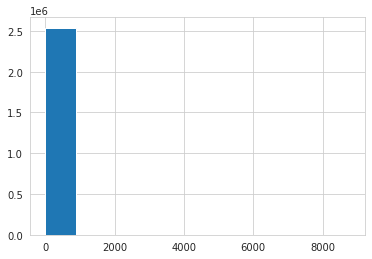

In [ ]:
# example of plotting a histogram of a random sample
from matplotlib import pyplot
from numpy.random import normal
# plot a histogram of the sample
pyplot.hist(rec_tot_dur)
pyplot.show()

## Binary Classificaition
* In this build the binary classifier over the dataset so for that we used Label column as a target variable, 0 for normal and 1 for attack records

## Converting String COlumns into StringIndexer

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
dstip_indexer = StringIndexer(inputCol="dstip", outputCol="dstipIndex")
proto_indexer = StringIndexer(inputCol="proto", outputCol="protoIndex")
state_indexer = StringIndexer(inputCol="state", outputCol="stateIndex")
service_indexer = StringIndexer(inputCol="service", outputCol="serviceIndex")
attack_cats_indexer = StringIndexer(inputCol="attack_cats", outputCol="attack_catsIndex")
srcip_indexer = StringIndexer(inputCol="srcip", outputCol="srcipIndex")

In [ ]:
pipe = Pipeline(stages = [dstip_indexer,proto_indexer,state_indexer,service_indexer,attack_cats_indexer,srcip_indexer])

In [ ]:
datav = pipe.fit(df).transform(df)
datav.show()

+----------+-----+-------------+------+-----+-----+------------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+----------+---------+----------+----------+------------+------------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+-----------+----------------+----------------+--------------+-----+-----------+----------+----------+----------+------------+----------------+----------+
|     srcip|sport|        dstip|dsport|proto|state|         dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|      Sjit|     Djit|     Stime|     Ltime|     Sintpkt|     Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_lt

## Creating Feature Vector

In [ ]:
columns_to_drop = ['dstip', 'proto','state','service','attack_cats','srcip']
datav = datav.drop(*columns_to_drop)

In [ ]:
cols=datav.columns
assembler = VectorAssembler(inputCols=cols,outputCol='features')
data = assembler.transform(datav)
data.select('features', 'Label').show() #we can apply truncate=False to see all features

+--------------------+-----+
|            features|Label|
+--------------------+-----+
|[56716.0,143.0,0....|    0|
|[43467.0,49729.0,...|    0|
|[41289.0,9574.0,0...|    0|
|[43785.0,6881.0,2...|    0|
|[40691.0,6881.0,2...|    0|
|[20393.0,5190.0,0...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|[14382.0,3354.0,0...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|[63414.0,10330.0,...|    0|
|[33555.0,6881.0,0...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|[16907.0,21.0,2.2...|    0|
|[1915.0,32945.0,0...|    0|
+--------------------+-----+
only showing top 20 rows



## StandarScaler

In [ ]:
standardscaler = StandardScaler(inputCol="features", outputCol="features_scaled")
data=standardscaler.fit(data).transform(data)

## Renaming Columns 

In [ ]:
sdata = data.select('features_scaled', 'Label')

In [ ]:
assembled_data = sdata.withColumnRenamed("features_scaled","features")
assembled_data.show()

+--------------------+-----+
|            features|Label|
+--------------------+-----+
|[2.77459021036591...|    0|
|[2.12643897090724...|    0|
|[2.01988954079621...|    0|
|[2.14199577475265...|    0|
|[1.99063492224415...|    0|
|[0.99764119754552...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|[0.70357846825380...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|[3.10226150645574...|    0|
|[1.64153633029177...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|(49,[0,1,2,3,4,5,...|    0|
|[0.82710340444771...|    0|
|[0.09368326844013...|    0|
+--------------------+-----+
only showing top 20 rows



#Split the data into training and test data 


In [ ]:
train_df,test_df=assembled_data.randomSplit([0.80,0.20])

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

## Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(featuresCol='features',labelCol='Label')

In [ ]:
dtc_model = dtc.fit(train_df) 

# Prediction

In [ ]:
dtc_prediction = dtc_model.transform(test_df)

In [ ]:
dtc_prediction.show()

+--------------------+-----+---------------+-----------+----------+
|            features|Label|  rawPrediction|probability|prediction|
+--------------------+-----+---------------+-----------+----------+
|(49,[0,1,2,3,4,5,...|    0|[1775368.0,0.0]|  [1.0,0.0]|       0.0|
|(49,[0,1,2,3,4,5,...|    0|[1775368.0,0.0]|  [1.0,0.0]|       0.0|
|(49,[0,1,2,3,4,5,...|    0|[1775368.0,0.0]|  [1.0,0.0]|       0.0|
|(49,[0,1,2,3,4,5,...|    0|[1775368.0,0.0]|  [1.0,0.0]|       0.0|
|(49,[0,1,2,3,4,5,...|    0|[1775368.0,0.0]|  [1.0,0.0]|       0.0|
|(49,[0,1,2,3,4,5,...|    0|[1775368.0,0.0]|  [1.0,0.0]|       0.0|
|(49,[0,1,2,3,4,5,...|    0|[1775368.0,0.0]|  [1.0,0.0]|       0.0|
|(49,[0,1,2,3,4,5,...|    0|[1775368.0,0.0]|  [1.0,0.0]|       0.0|
|(49,[0,1,2,3,4,5,...|    0|[1775368.0,0.0]|  [1.0,0.0]|       0.0|
|(49,[0,1,2,3,4,5,...|    0|[1775368.0,0.0]|  [1.0,0.0]|       0.0|
|(49,[0,1,2,3,4,5,...|    0|[1775368.0,0.0]|  [1.0,0.0]|       0.0|
|(49,[0,1,2,3,4,5,...|    0|[1775368.0,0.0]|  [1

## Evaluation

In [ ]:
#import the library
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
dtc_accuracy=MulticlassClassificationEvaluator(labelCol='Label',metricName='accuracy').evaluate(dtc_prediction)

In [ ]:
print('The accuracy of Decission Tree Classifier on test data is {0:.2%}'.format(dtc_accuracy))

The accuracy of Decission Tree Classifier on test data is 100.00%


## Confusion Matrix

In [ ]:
y_test = dtc_prediction.select('Label').toPandas()
y_test_pred = dtc_prediction.select('prediction').toPandas()

In [ ]:
cf_matrix = confusion_matrix(y_test, y_test_pred)
cf_matrix

array([[443088,      0],
       [     0,  64276]])

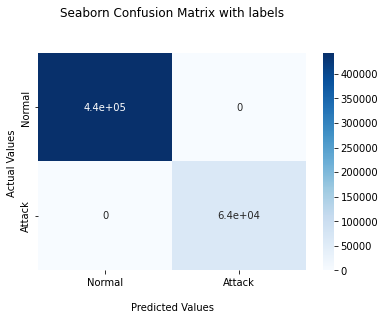

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Normal','Attack'])
ax.yaxis.set_ticklabels(['Normal','Attack'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
dtc_precision=MulticlassClassificationEvaluator(labelCol='Label',metricName='weightedPrecision').evaluate(dtc_prediction)
dtc_Recall=MulticlassClassificationEvaluator(labelCol='Label',metricName='weightedRecall').evaluate(dtc_prediction)
dtc_FM=MulticlassClassificationEvaluator(labelCol='Label',metricName='weightedFMeasure').evaluate(dtc_prediction)
print('The precision of Decission Tree Classifier on test data is {0:.2%}'.format(dtc_precision))
print('The Recall of Decission Tree Classifier on test data is {0:.2%}'.format(dtc_precision))
print('The FM of Decission Tree Classifier on test data is {0:.2%}'.format(dtc_precision))

The precision of Decission Tree Classifier on test data is 100.00%
The Recall of Decission Tree Classifier on test data is 100.00%
The FM of Decission Tree Classifier on test data is 100.00%


# Part B 

## Multi-Classification

In this part build the Mutli class classifier model to classify the data into ten classes categories normal, Fuzzers, analysis, Backdoors, Dos, Exploits, Generic, Reconnaissance, Shellcode and Worms. 

In [ ]:
datas = data.select('features_scaled', 'attack_catsIndex')

## Renaming Columns 

In [ ]:
assembled_data = datas.withColumnRenamed("features_scaled","features")
assembled_data = assembled_data.withColumnRenamed("attack_catsIndex","Label")
assembled_data.show()

+--------------------+-----+
|            features|Label|
+--------------------+-----+
|[2.77459021036591...|  0.0|
|[2.12643897090724...|  0.0|
|[2.01988954079621...|  0.0|
|[2.14199577475265...|  0.0|
|[1.99063492224415...|  0.0|
|[0.99764119754552...|  0.0|
|(49,[0,1,2,3,4,5,...|  0.0|
|[0.70357846825380...|  0.0|
|(49,[0,1,2,3,4,5,...|  0.0|
|(49,[0,1,2,3,4,5,...|  0.0|
|(49,[0,1,2,3,4,5,...|  0.0|
|[3.10226150645574...|  0.0|
|[1.64153633029177...|  0.0|
|(49,[0,1,2,3,4,5,...|  0.0|
|(49,[0,1,2,3,4,5,...|  0.0|
|(49,[0,1,2,3,4,5,...|  0.0|
|(49,[0,1,2,3,4,5,...|  0.0|
|(49,[0,1,2,3,4,5,...|  0.0|
|[0.82710340444771...|  0.0|
|[0.09368326844013...|  0.0|
+--------------------+-----+
only showing top 20 rows



#Split the data into training and test data 


In [ ]:
trainf_df,testf_df=assembled_data.randomSplit([0.80,0.20])

## Decision Tree Classifier 

In [ ]:
from pyspark.ml.classification import OneVsRest

In [ ]:
dtcm = DecisionTreeClassifier(featuresCol='features',labelCol='Label')

In [ ]:
dfr = OneVsRest(classifier=dtcm)
dtc_modelm = dfr.fit(trainf_df) 

## Prediction

In [ ]:
# test model on test data
dtc_predictionm = dtc_modelm.transform(testf_df)

In [ ]:
dtc_predictionm.show(5)

+--------------------+-----+--------------------+----------+
|            features|Label|       rawPrediction|prediction|
+--------------------+-----+--------------------+----------+
|(49,[0,1,2,3,4,5,...|  0.0|[1773881.0,0.0,0....|       0.0|
|(49,[0,1,2,3,4,5,...|  0.0|[1773881.0,0.0,0....|       0.0|
|(49,[0,1,2,3,4,5,...|  0.0|[1773881.0,0.0,0....|       0.0|
|(49,[0,1,2,3,4,5,...|  0.0|[1773881.0,0.0,0....|       0.0|
|(49,[0,1,2,3,4,5,...|  0.0|[1773881.0,0.0,0....|       0.0|
+--------------------+-----+--------------------+----------+
only showing top 5 rows



## Evaluation

In [ ]:
#import the library
dtc_accuracy=MulticlassClassificationEvaluator(labelCol='Label',metricName='accuracy').evaluate(dtc_predictionm)

In [ ]:
print('The accuracy of Decission Tree Classifier on test data is {0:.2%}'.format(dtc_accuracy))

The accuracy of Decission Tree Classifier on test data is 100.00%


## Confusion Matrix

In [ ]:
y_test = dtc_predictionm.select('Label').toPandas()
y_test_pred = dtc_predictionm.select('prediction').toPandas()

In [ ]:
cf_matrix = confusion_matrix(y_test, y_test_pred)

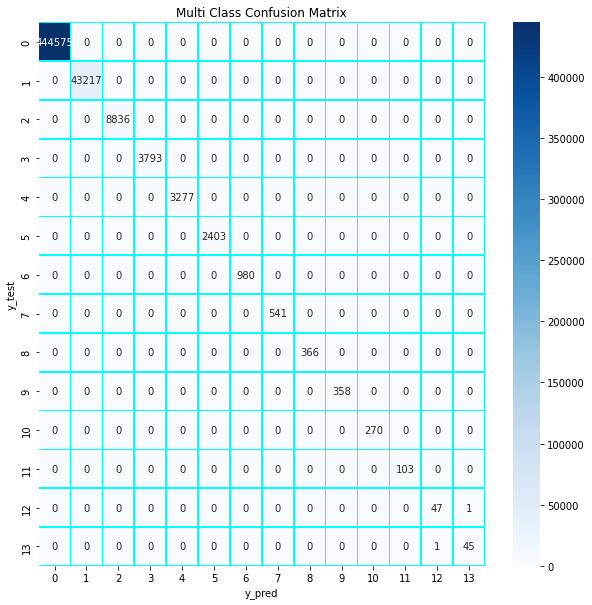

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cf_matrix, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='Blues')
plt.title('Multi Class Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [ ]:
dtc_precision=MulticlassClassificationEvaluator(labelCol='Label',metricName='weightedPrecision').evaluate(dtc_predictionm)
dtc_Recall=MulticlassClassificationEvaluator(labelCol='Label',metricName='weightedRecall').evaluate(dtc_predictionm)
dtc_FM=MulticlassClassificationEvaluator(labelCol='Label',metricName='weightedFMeasure').evaluate(dtc_predictionm)
print('The precision of Decission Tree Classifier on test data is {0:.2%}'.format(dtc_precision))
print('The Recall of Decission Tree Classifier on test data is {0:.2%}'.format(dtc_precision))
print('The FM of Decission Tree Classifier on test data is {0:.2%}'.format(dtc_precision))

The precision of Decission Tree Classifier on test data is 100.00%
The Recall of Decission Tree Classifier on test data is 100.00%
The FM of Decission Tree Classifier on test data is 100.00%


## Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    444575
         1.0       1.00      1.00      1.00     43217
         2.0       1.00      1.00      1.00      8836
         3.0       1.00      1.00      1.00      3793
         4.0       1.00      1.00      1.00      3277
         5.0       1.00      1.00      1.00      2403
         6.0       1.00      1.00      1.00       980
         7.0       1.00      1.00      1.00       541
         8.0       1.00      1.00      1.00       366
         9.0       1.00      1.00      1.00       358
        10.0       1.00      1.00      1.00       270
        11.0       1.00      1.00      1.00       103
        12.0       0.98      0.98      0.98        48
        13.0       0.98      0.98      0.98        46

    accuracy                           1.00    508813
   macro avg       1.00      1.00      1.00    508813
weighted avg       1.00      1.00      1.00    508813

